In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.impute import KNNImputer
import category_encoders as ce
from sklearn.preprocessing import RobustScaler

# Loading and discovering the dataset


In [48]:
df = pd.read_csv("IMDb Movies India.csv", encoding = 'latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [50]:
df.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

# Data Preprocessing


## Missing Values

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


Text(0.5, 1.0, 'Missing values')

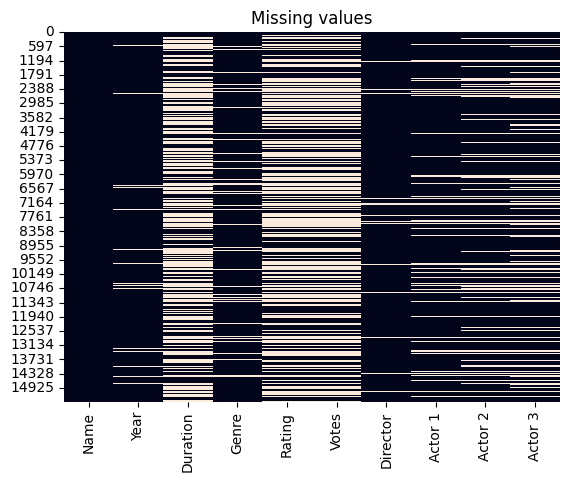

In [51]:
# Missing values
print(df.isnull().sum())
sns.heatmap(df.isnull(), cbar = False).set_title('Missing values')

In [52]:
# Handle missing values 
# Deletion 
df = df.dropna(subset = ['Rating', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])

In [53]:
print(df.isnull().sum())
print(df.shape)

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64
(7558, 10)


In [54]:
# Duration: Imputation (Mean)
# remove 'min' prefix and cast it to numerical type
df['Duration'] = df['Duration'].str.replace(' min', '')

In [55]:
# Convert the 'Duration' column to numeric, forcing errors to NaN
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df['Duration'].dtypes

dtype('float64')

In [56]:
df['Duration'].fillna(df['Duration'].mean(), inplace=True)
df['Duration'].isnull().sum()

0

In [57]:
print(df.isnull().sum())
print(df.shape)

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64
(7558, 10)


## Duplication

In [58]:
# Duplicates: remove duplicated movies
duplicated = df[df.duplicated(subset = ['Name', 'Year', 'Director'])]
duplicated.head()
# df[df['Name'] == "Sant Dnyaneshwar"]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12421,Sant Dnyaneshwar,(1940),137.0,Biography,8.1,9,Vishnupant Govind Damle,Sheikh Fattelal,Shahu Modak,Datta Dharmadhikari


In [59]:
df.drop_duplicates(subset = ['Name', 'Year', 'Director'], inplace = True)

## Encoding categorical data using JamesStein Encoding

In [60]:
print(df.nunique())
print(df.dtypes)
print(df.shape)

Name        7038
Year          92
Duration     175
Genre        416
Rating        84
Votes       2030
Director    2956
Actor 1     2415
Actor 2     2783
Actor 3     3031
dtype: int64
Name         object
Year         object
Duration    float64
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object
(7557, 10)


In [61]:
# Drop Name column (uncorrelated with Rating)
df.drop("Name", axis = 1, inplace = True)
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,(2019),109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,(2019),110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,(1997),147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,(2005),142.0,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,(2012),82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [62]:
# Year: remove () and cast to int
df['Year'] = df['Year'].str.replace('(', '')
df['Year'] = df['Year'].str.replace(')', '')
df['Year'] = df['Year'].astype("int")

c:\Users\hamza\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
c:\Users\hamza\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
# Votes: remove "," and cast it to int
df['Votes'] = df['Votes'].str.replace(',', '').astype('int')

In [64]:
X = df.drop(columns="Rating")
y = df["Rating"]

In [65]:
#  JamesStein Encoding
encoder = ce.JamesSteinEncoder(return_df=True)
encoder.fit(X,y)
X = encoder.transform(X.loc[:,:])


In [66]:
X.head()

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109.0,6.106459,8,7.000000,6.825622,7.000000,7.000000
3,2019,110.0,5.751999,35,4.400000,5.569177,4.400000,4.453623
5,1997,147.0,6.041301,827,5.562992,5.212703,5.799410,5.787425
6,2005,142.0,6.370402,1086,7.236207,5.531740,5.894741,6.164285
8,2012,82.0,5.644356,326,5.600000,5.600000,5.839576,5.600000


## Scaling / Normalizing the data

In [67]:
scaler = RobustScaler()
scaler.fit(X)
X.loc[:,:] = scaler.transform(X.loc[:,:])

# Regression Model 

In [68]:
# Needed libraries
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
# Train test split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7,shuffle=True)

In [70]:
#Training XGBoost model

xgb_model = XGBRegressor(objective ='reg:squarederror',gamma=0.09,learning_rate=0.08,subsample=0.7)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.09, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [71]:
#Model Evaluation

y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
  


print(f"Report: XGBoost model")
print(f"Mean squared error {mse}")
print(f"r² score {r2}")

Report: XGBoost model
Mean squared error 0.3136710198797891
r² score 0.8273543462695724
